In [1733]:
# PACKAGES

In [1734]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

In [1735]:
# importation de WARNING
import warnings
warnings.filterwarnings("ignore")

In [1736]:
data = pd.read_csv("../BISIMWA M DESTIN/Mall_Customers.csv")

In [1737]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [1738]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [1739]:
data.shape

(200, 5)

In [1740]:
data['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [1741]:
#data['CustomerID'].unique()

In [1742]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# PRE-TRAITEMENT DES DONNEES

## a. Mapping de de la colonne Genre

In [1743]:
                                                   # METHODE 1 DE MAPPING PAR CREATION D'UN DICTIONNAIRE

# On crée un dictionnaire pour permettre à MAPPER la colonne Genre
# NB: Ns créons un dictionnaire pcq cette colonnes a 2 élements
#Genre_mapp={
 #   'Male':0,
  #  'Female':1,   
#}

In [1744]:
# Appliquons alors le mapping sur le dataset
# La colonne Genre a changée ses données en 0 et 1 avec le MAPPING automatique
#data['Genre']= data['Genre'].map(Genre_mapp)
#data

In [1745]:
                                                                       # METHODE 2 DE MAPPING PAR MAPPING AUTOMATIQUE

Genre_mapp = LabelEncoder()
data['Genre'] = Genre_mapp.fit_transform(data['Genre'])
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [1746]:
                                                                                   # IIIème METHODE

#data['Genre']=np.where(data['Genre']=='Male',1,0)
#data
           ## CA PASSE BIEN

<Axes: >

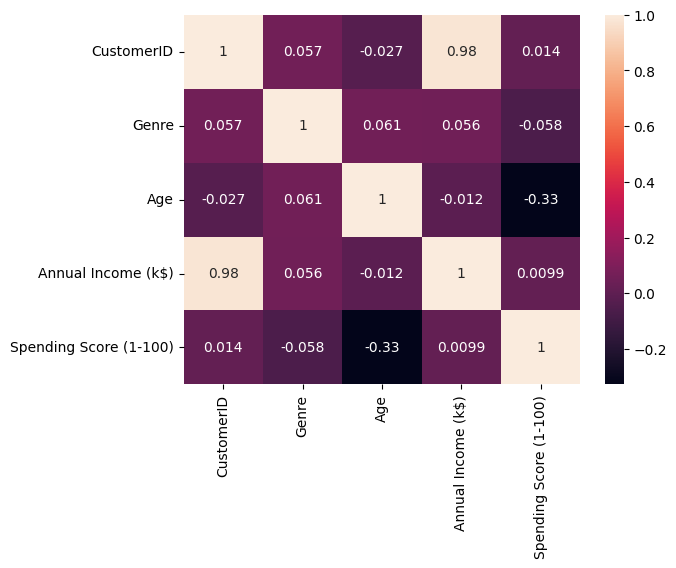

In [1747]:
# LA MATRICE DE CORRELATION
sns.heatmap(data.corr(), annot=True)

## b. Extrtaction des variables indépendantes

In [1748]:
#from sklearn.model_selection import train_test_split

In [1749]:
X = data.iloc[:, 3:5].values
X
#y = data.iloc[:,-1]
#X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1)
#print("X_train:", X_train.shape )
#print("X_test:", X_test.shape )
#print("Y_train:", y_train.shape )
#print("Y_test:", y_test.shape )

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# NOMBRE OPTIMAL DE CLUSTER PAR LA METHODE Elbow(COUDE)

<function matplotlib.pyplot.show(close=None, block=None)>

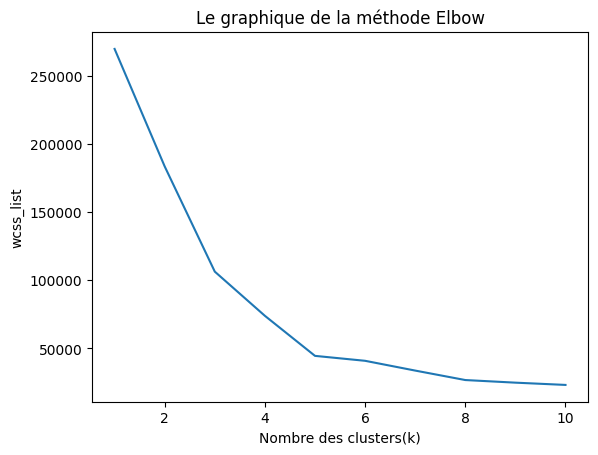

In [1750]:
from sklearn.cluster import KMeans

wcss_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title("Le graphique de la méthode Elbow")
plt.xlabel("Nombre des clusters(k)")
plt.ylabel("wcss_list")
plt.show

# ENTRAINEMENT DU MODELE K-MEANS SUR UN ENSEMBLE DES DONNEES

In [1751]:
    Kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

# prediction du modele

In [1752]:
y_predict = kmeans.fit_predict(X)

In [1753]:
y_predict

array([6, 3, 4, 3, 6, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 6, 8, 6, 3, 6, 8,
       4, 8, 4, 3, 6, 8, 6, 3, 4, 8, 4, 3, 4, 3, 4, 8, 6, 8, 6, 3, 6, 8,
       6, 8, 8, 6, 6, 6, 0, 8, 0, 8, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 0, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 2, 5, 2, 5, 2, 1, 2, 1,
       2, 5, 2, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 9, 7, 9,
       7, 9], dtype=int32)

# VISUALISATION DE CLUSTERS

<function matplotlib.pyplot.show(close=None, block=None)>

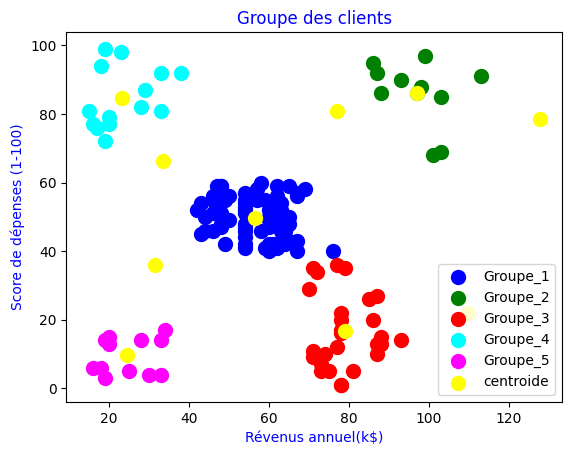

In [1759]:
plt.scatter(X[y_predict ==0,0], X[y_predict ==0,1], s=100, c='blue', label = "Groupe_1")
plt.scatter(X[y_predict ==1,0], X[y_predict ==1,1], s=100, c='green', label = "Groupe_2")
plt.scatter(X[y_predict ==2,0], X[y_predict ==2,1], s=100, c='red', label = "Groupe_3")
plt.scatter(X[y_predict ==3,0], X[y_predict ==3,1], s=100, c='cyan', label = "Groupe_4")
plt.scatter(X[y_predict ==4,0], X[y_predict ==4,1], s=100, c='magenta', label = "Groupe_5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'centroide')
plt.title('Groupe des clients', color="blue")
plt.xlabel("Révenus annuel(k$)", color="blue")
plt.ylabel("Score de dépenses (1-100)", color="blue")
plt.legend()
plt.show